In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [41]:
boston = load_boston()

c:\Python311\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :fun

In [42]:
boston.data.shape

(506, 13)

In [43]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [44]:
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [45]:
# Adding 'Price' (target) column to the data
# boston.target.shape
print(data.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B   
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000  \
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [46]:
# data['Price'] = boston.target
# data.head()


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [48]:
# Input Data
x = boston.data

# Output Data
y = boston.target
# splitting data to training and testing dataset.
x_train, x_test, ytrain, y_test = train_test_split(x, y, test_size=0.2,random_state=42)


In [49]:
# Fitting Multi Linear regression model to training model
reg = LinearRegression()
reg.fit(x_train, ytrain)

# predicting the test set results
y_pred = reg.predict(x_test)
reg.coef_


array([-1.13055924e-01,  3.01104641e-02,  4.03807204e-02,  2.78443820e+00,
       -1.72026334e+01,  4.43883520e+00, -6.29636221e-03, -1.44786537e+00,
        2.62429736e-01, -1.06467863e-02, -9.15456240e-01,  1.23513347e-02,
       -5.08571424e-01])

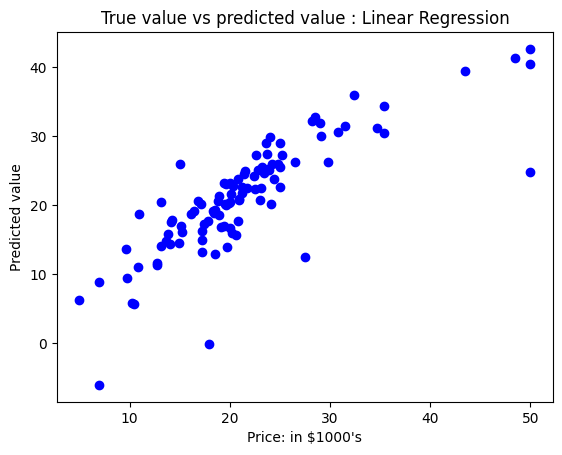

In [50]:
# Plotting Scatter graph to show the prediction
plt.scatter(y_test, y_pred, c='blue')
plt.xlabel("Price: in $1000's")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()


In [51]:
Mean_Square_Error = mean_squared_error(y_test, y_pred)
Mean_Absolute_Error  = mean_absolute_error(y_test,y_pred)
print("Mean Square Error : ", Mean_Square_Error)
print("Mean Absolute Error : ", Mean_Absolute_Error )

Mean Square Error :  24.29111947497386
Mean Absolute Error :  3.1890919658878847


In [61]:
# print("Actual Value : " + str(y_test))
# print("Prediction Value : " + str(y_pred))


for i in range(len(y_test)):
    print(f"y_pred : {y_pred[i]:.4f} <=====> y_test: {y_test[i]}")

y_pred : 28.9967 <=====> y_test: 23.6
y_pred : 36.0256 <=====> y_test: 32.4
y_pred : 14.8169 <=====> y_test: 13.6
y_pred : 25.0320 <=====> y_test: 22.8
y_pred : 18.7699 <=====> y_test: 16.1
y_pred : 23.2544 <=====> y_test: 20.0
y_pred : 17.6625 <=====> y_test: 17.8
y_pred : 14.3412 <=====> y_test: 14.0
y_pred : 23.0132 <=====> y_test: 19.6
y_pred : 20.6325 <=====> y_test: 16.8
y_pred : 24.9085 <=====> y_test: 21.5
y_pred : 18.6388 <=====> y_test: 18.9
y_pred : -6.0884 <=====> y_test: 7.0
y_pred : 21.7583 <=====> y_test: 21.2
y_pred : 19.2392 <=====> y_test: 18.5
y_pred : 26.1932 <=====> y_test: 29.8
y_pred : 20.6477 <=====> y_test: 18.8
y_pred : 5.7947 <=====> y_test: 10.2
y_pred : 40.5003 <=====> y_test: 50.0
y_pred : 17.6129 <=====> y_test: 14.1
y_pred : 27.2491 <=====> y_test: 25.2
y_pred : 30.0663 <=====> y_test: 29.1
y_pred : 11.3418 <=====> y_test: 12.7
y_pred : 24.1608 <=====> y_test: 22.4
y_pred : 17.8606 <=====> y_test: 14.2
y_pred : 15.8361 <=====> y_test: 13.8
y_pred : 22.78